In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
from os import listdir
from os.path import isfile, join
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
mypath = '../../data/MLgSA/wss/'
mypath1 = '../../data/MLgSA/New_wss/'

onlyfiles = np.asarray([f for f in listdir(mypath) if isfile(join(mypath, f))])
onlyfiles1 = np.asarray([f for f in listdir(mypath1) if isfile(join(mypath1, f))])

onlyfiles.sort()
onlyfiles1.sort()

print(len(onlyfiles), len(onlyfiles1))

short_list = np.asarray([s[5:23] if s[19] == 'l' else s[5:24] for s in onlyfiles])
short_list1 = np.asarray([s[5:23] if s[19] == 'l' else s[5:24] for s in onlyfiles1])
# short_list = np.asarray([s[5:23] if s[19] == 'l' else s[5:24] for s in onlyfiles])

108 30


In [3]:
meshes = []

for f in onlyfiles:
    reader = pv.get_reader(mypath + f)
    meshes.append(reader.read())
    
for f in onlyfiles1:
    reader = pv.get_reader(mypath1 + f)
    meshes.append(reader.read())

In [13]:
del meshes[33]

In [34]:
cols = ['longitudinal_WSS_@_t=1.1', 'non-directional_WSS_@_t=1.1', 'longitudinal_WSS_@_t=1.55', 'non-directional_WSS_@_t=1.55']

In [60]:
def get_pca(mesh):
    
    
    features = np.vstack([
    mesh.point_data[cols[0]],
    mesh.point_data[cols[1]],
    mesh.point_data[cols[2]],
    mesh.point_data[cols[3]],
    ]).T
    
    # Standardize the features
    scaler = StandardScaler()
    features_standardized = scaler.fit_transform(features)
    
    # Apply PCA
    pca = PCA(n_components=4)
    principal_components = pca.fit_transform(features_standardized)
    
    # Get the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    # print("Explained Variance Ratio:", explained_variance_ratio)
    
    # Get the components (eigenvectors)
    components = pca.components_
    # print("PCA Components:\n", components)


    plt.figure(figsize=(8, 6))
    plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Node Features')
    plt.grid(True)
    plt.show()

    return explained_variance_ratio, components

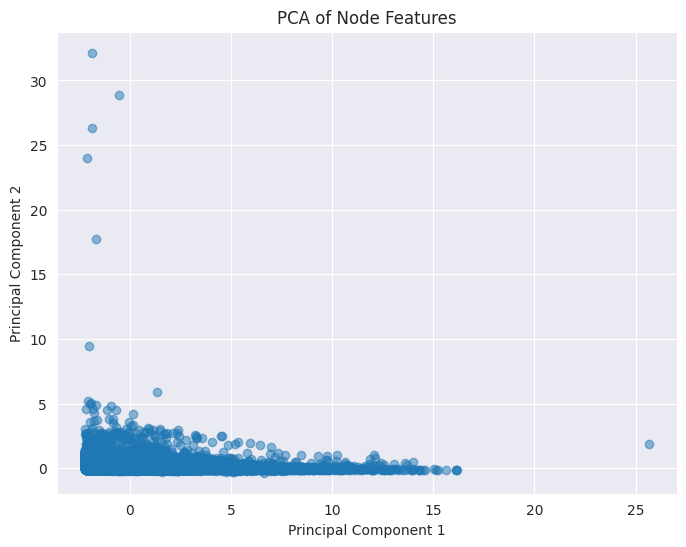

In [62]:
evr, co = get_pca(meshes[0])

In [63]:
co

array([[ 0.50486557,  0.50205604,  0.49559258,  0.49743189],
       [-0.34499457,  0.43167713, -0.63163341,  0.54375807],
       [-0.46830084, -0.51639365,  0.40949803,  0.58850938],
       [ 0.63779607, -0.54307659, -0.43328812,  0.33248367]])